# **Ekstraksi Keywords Berita Online**

**Import Data**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/aulyamiftahkhulhikmah/Dataset/main/radarjatim_hukumKriminal.csv')
df

,Judul,Content,Category
0,"Laporan Dugaan Proyek Fiktif di IMS, Polda Jat...",SURABAYA (RadarJatim.id) Polda Jatim bekerja e...,Hukum dan Kriminal
1,"Lakukan Penipuan Lewat Online Shop, Warga Suko...",SIDOARJO (RadarJatim.id) – Jaksa Penuntut Umum...,Hukum dan Kriminal
2,Erick Thohir Kerja Cepat Bereskan Kasus Penyel...,JAKARTA (RadarJatim.id) Menteri BUMN Erick Tho...,Hukum dan Kriminal
3,Bupati bersama Forkopimda Musnahkan Barang Buk...,SIDOARJO (RadarJatim.id) — Kejaksaan Negeri (K...,Hukum dan Kriminal
4,"Merasa Dirugikan, Kuasa Hukum Sudarsono Lapork...","BANYUWANGI (RadarJatim.id)--Sudarsono, warga D...",Ekonomi Bisnis
...,...,...,...
95,Menunggu Ending Kasus Penistaan Agama Bermodus...,Catatan Pinggiran SUHARTOKO Sempat membuat heb...,Hukum dan Kriminal
96,"Terima Pengaduan Status Tanah, Wawali Armuji G...",SURABAYA (RadarJatim.id) Wakil Wali Kota Surab...,Hukum dan Kriminal
97,Hunian Rutan Surabaya Meningkat Hingga 150 Persen,SIDOARJO (RadarJatim.id) – Penataan ulang Ruta...,Hukum dan Kriminal
98,KPK Lelang 14 Barang Eks Gratifikasi di Road t...,SURABAYA (RadarJatim.id) Komisi Pemberantasan ...,Hukum dan Kriminal


**Pre-Processing**

Cek Data Kosong & Duplikat

In [3]:
df.isnull().sum()

Judul       0
Content     0
Category    0
dtype: int64

In [4]:
df.duplicated().sum()

0

Cleansing Data

In [5]:
import re, string

# Text Cleaning
def cleaning(text):
    # Menghapus tag HTML
    text = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});').sub('', str(text))

    # Mengubah seluruh teks menjadi huruf kecil
    text = text.lower()

    # Menghapus spasi pada teks
    text = text.strip()

    # Menghapus Tanda Baca, karakter spesial, and spasi ganda
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub("â½ïgoal", "", text)
    text = re.sub("SCROLL TO CONTINUE WITH CONTENT", "", text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)


    # Menghapus Nomor
    text = re.sub(r'\[[0-9]*\]', ' ', text)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d', ' ', text)
    text = re.sub(r'\s+', ' ', text)

    # Mengubah text yang berisi 'nan' dengan whitespace agar nantinya dapat dihapus
    text = re.sub('nan', '', text)

    return text

In [6]:
df['Content'] = df['Content'].apply(lambda x: cleaning(x))

In [7]:
df

,Judul,Content,Category
0,"Laporan Dugaan Proyek Fiktif di IMS, Polda Jat...",surabaya radarjatim id polda jatim bekerja ekt...,Hukum dan Kriminal
1,"Lakukan Penipuan Lewat Online Shop, Warga Suko...",sidoarjo radarjatim id jaksa penuntut umum jpu...,Hukum dan Kriminal
2,Erick Thohir Kerja Cepat Bereskan Kasus Penyel...,jakarta radarjatim id menteri bumn erick thohi...,Hukum dan Kriminal
3,Bupati bersama Forkopimda Musnahkan Barang Buk...,sidoarjo radarjatim id kejaksaan negeri kejari...,Hukum dan Kriminal
4,"Merasa Dirugikan, Kuasa Hukum Sudarsono Lapork...",banyuwangi radarjatim id sudarsono warga desa ...,Ekonomi Bisnis
...,...,...,...
95,Menunggu Ending Kasus Penistaan Agama Bermodus...,catatan pinggiran suhartoko sempat membuat heb...,Hukum dan Kriminal
96,"Terima Pengaduan Status Tanah, Wawali Armuji G...",surabaya radarjatim id wakil wali kota surabay...,Hukum dan Kriminal
97,Hunian Rutan Surabaya Meningkat Hingga 150 Persen,sidoarjo radarjatim id penataan ulang rutan i ...,Hukum dan Kriminal
98,KPK Lelang 14 Barang Eks Gratifikasi di Road t...,surabaya radarjatim id komisi pemberantasan ko...,Hukum dan Kriminal


Tokenisasi Data

In [8]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
df["Tokenizing_Content"] = df['Content'].apply(sent_tokenize)
df.head()

,Judul,Content,Category,Tokenizing_Content
0,"Laporan Dugaan Proyek Fiktif di IMS, Polda Jat...",surabaya radarjatim id polda jatim bekerja ekt...,Hukum dan Kriminal,[surabaya radarjatim id polda jatim bekerja ek...
1,"Lakukan Penipuan Lewat Online Shop, Warga Suko...",sidoarjo radarjatim id jaksa penuntut umum jpu...,Hukum dan Kriminal,[sidoarjo radarjatim id jaksa penuntut umum jp...
2,Erick Thohir Kerja Cepat Bereskan Kasus Penyel...,jakarta radarjatim id menteri bumn erick thohi...,Hukum dan Kriminal,[jakarta radarjatim id menteri bumn erick thoh...
3,Bupati bersama Forkopimda Musnahkan Barang Buk...,sidoarjo radarjatim id kejaksaan negeri kejari...,Hukum dan Kriminal,[sidoarjo radarjatim id kejaksaan negeri kejar...
4,"Merasa Dirugikan, Kuasa Hukum Sudarsono Lapork...",banyuwangi radarjatim id sudarsono warga desa ...,Ekonomi Bisnis,[banyuwangi radarjatim id sudarsono warga desa...


StopWords Data

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
from nltk.corpus import stopwords
from itertools import chain

stop_words = set(chain(stopwords.words('indonesian')))
df['Tokenizing_Content'] = df['Tokenizing_Content'].apply(lambda x: [w for w in x if not w in stop_words])

In [12]:
df['Content'] = df['Tokenizing_Content'].apply(lambda tokens: ' '.join(tokens))

In [13]:
df.head()

,Judul,Content,Category,Tokenizing_Content
0,"Laporan Dugaan Proyek Fiktif di IMS, Polda Jat...",surabaya radarjatim id polda jatim bekerja ekt...,Hukum dan Kriminal,[surabaya radarjatim id polda jatim bekerja ek...
1,"Lakukan Penipuan Lewat Online Shop, Warga Suko...",sidoarjo radarjatim id jaksa penuntut umum jpu...,Hukum dan Kriminal,[sidoarjo radarjatim id jaksa penuntut umum jp...
2,Erick Thohir Kerja Cepat Bereskan Kasus Penyel...,jakarta radarjatim id menteri bumn erick thohi...,Hukum dan Kriminal,[jakarta radarjatim id menteri bumn erick thoh...
3,Bupati bersama Forkopimda Musnahkan Barang Buk...,sidoarjo radarjatim id kejaksaan negeri kejari...,Hukum dan Kriminal,[sidoarjo radarjatim id kejaksaan negeri kejar...
4,"Merasa Dirugikan, Kuasa Hukum Sudarsono Lapork...",banyuwangi radarjatim id sudarsono warga desa ...,Ekonomi Bisnis,[banyuwangi radarjatim id sudarsono warga desa...


**Co-Occurency Matriks**

In [14]:
df['Content'][0]

'surabaya radarjatim id polda jatim bekerja ektra untuk mengungkap dugaan korupsi di tubuh anak perusahaan pt inka madiun yakni pt inka multi solusi ims lebih dari orang baik swasta reke pt ims mapun petinggi ims telah dimintai keterangan di subdit tipikor ditkrimsus polda jatim mereka ditengarai berbuat pidana korupsi dibalik proyek fiktif seputar perkereta apian yang merugikan keuangan negara sekitar rp miliar mohammad yunus selaku pengadu dugaan permai proyek yang diarahkan mantan direktur dan komisaris anak perusahaan pt inka ini mengaku sangat mengapresiasi kinerja polda jatim jujur saja kami sangat mengapresiasi kinerja dari tim penyidik ditreskrimsus polda jatim sudah banyak mengambil langkah dan memeriksa sejumlah petinggi pt ims dan kami yakin tidak akan lama lagi pengaduan kami akan dinaikkan menjadi penyidikan kata yunus sumber di lingkungan ditreskrimsu polda jatim nama nama yang sudah diundang untuk diklarifikasi dugaan korupsi ini di antaranya komisaris utama pt ims muham

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer=lambda x: x.split())
X = vectorizer.fit_transform([df['Content'][0]])

co_occurrence_matrix = (X.T * X)
co_occurrence_matrix.setdiag(0)

co_occurrence_df = pd.DataFrame(co_occurrence_matrix.toarray(), columns=vectorizer.get_feature_names_out(),index=vectorizer.get_feature_names_out())
co_occurrence_df

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,adalah,adanya,agar,agung,ahmad,akan,akibat,akpol,akutansi,alternatif,...,vendor,vii,wahyuni,waktu,warga,widyata,yakin,yakni,yang,yunus
adalah,0,2,1,1,1,4,1,1,1,1,...,2,1,1,1,2,1,1,1,18,6
adanya,2,0,2,2,2,8,2,2,2,2,...,4,2,2,2,4,2,2,2,36,12
agar,1,2,0,1,1,4,1,1,1,1,...,2,1,1,1,2,1,1,1,18,6
agung,1,2,1,0,1,4,1,1,1,1,...,2,1,1,1,2,1,1,1,18,6
ahmad,1,2,1,1,0,4,1,1,1,1,...,2,1,1,1,2,1,1,1,18,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
widyata,1,2,1,1,1,4,1,1,1,1,...,2,1,1,1,2,0,1,1,18,6
yakin,1,2,1,1,1,4,1,1,1,1,...,2,1,1,1,2,1,0,1,18,6
yakni,1,2,1,1,1,4,1,1,1,1,...,2,1,1,1,2,1,1,0,18,6
yang,18,36,18,18,18,72,18,18,18,18,...,36,18,18,18,36,18,18,18,0,108


**Graph Co-occurency**

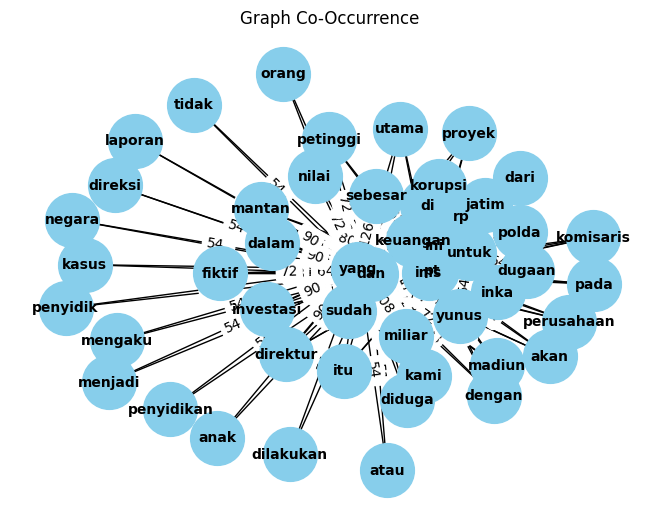

In [16]:
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
G = nx.Graph()
for idx, row in co_occurrence_df.iterrows():
    for col in co_occurrence_df.columns:
        weight = co_occurrence_df.loc[idx, col]
        if weight > 50 and idx != col:
            G.add_edge(idx, col, weight=weight)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=1500, edge_color='black', linewidths=1, font_size=10)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Graph Co-Occurrence')
plt.show()

**Closeness Centrality**

In [17]:
closeness_centrality = nx.closeness_centrality(G)
print("Closeness Centrality:")
for node, closeness in sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True):
    print(f"{node}: {closeness}")

Closeness Centrality:
dan: 1.0
yang: 1.0
ims: 0.7903225806451613
pt: 0.7903225806451613
ini: 0.6049382716049383
keuangan: 0.6049382716049383
untuk: 0.6049382716049383
di: 0.5764705882352941
rp: 0.5764705882352941
inka: 0.550561797752809
jatim: 0.550561797752809
korupsi: 0.550561797752809
polda: 0.550561797752809
sebesar: 0.550561797752809
dugaan: 0.5384615384615384
miliar: 0.5384615384615384
sudah: 0.5384615384615384
yunus: 0.5384615384615384
akan: 0.5212765957446809
dalam: 0.5212765957446809
dari: 0.5212765957446809
dengan: 0.5212765957446809
diduga: 0.5212765957446809
direktur: 0.5212765957446809
fiktif: 0.5212765957446809
investasi: 0.5212765957446809
itu: 0.5212765957446809
kami: 0.5212765957446809
komisaris: 0.5212765957446809
madiun: 0.5212765957446809
mantan: 0.5212765957446809
nilai: 0.5212765957446809
pada: 0.5212765957446809
perusahaan: 0.5212765957446809
petinggi: 0.5212765957446809
proyek: 0.5212765957446809
utama: 0.5212765957446809
anak: 0.5104166666666666
atau: 0.5104166

**PageRank Centrality**

In [18]:
pagerank = nx.pagerank(G)
print("\nPageRank:")
for node, rank in sorted(pagerank.items(), key=lambda x: x[1], reverse=True):
    print(f"{node}: {rank}")


PageRank:
yang: 0.13315744996283183
dan: 0.12631456203413788
pt: 0.0925749379938709
ims: 0.08728363382187795
ini: 0.03411786047111041
keuangan: 0.03411786047111041
untuk: 0.03411786047111041
di: 0.0264019621458316
rp: 0.0264019621458316
inka: 0.019350221495785955
jatim: 0.019350221495785955
korupsi: 0.019350221495785955
polda: 0.019350221495785955
sebesar: 0.019350221495785955
dugaan: 0.015034285953339516
miliar: 0.015034285953339516
sudah: 0.015034285953339516
yunus: 0.015034285953339516
dalam: 0.010292696556442294
dari: 0.010292696556442294
direktur: 0.010292696556442294
investasi: 0.010292696556442294
itu: 0.010292696556442294
kami: 0.010292696556442294
mantan: 0.010292696556442294
akan: 0.008834157245153835
dengan: 0.008834157245153835
diduga: 0.008834157245153835
fiktif: 0.008834157245153835
komisaris: 0.008834157245153835
madiun: 0.008834157245153835
nilai: 0.008834157245153835
pada: 0.008834157245153835
perusahaan: 0.008834157245153835
petinggi: 0.008834157245153835
proyek: 0.0

**Rangking Kata Penting dari Centrality**

In [19]:
df['Content'][0]

'surabaya radarjatim id polda jatim bekerja ektra untuk mengungkap dugaan korupsi di tubuh anak perusahaan pt inka madiun yakni pt inka multi solusi ims lebih dari orang baik swasta reke pt ims mapun petinggi ims telah dimintai keterangan di subdit tipikor ditkrimsus polda jatim mereka ditengarai berbuat pidana korupsi dibalik proyek fiktif seputar perkereta apian yang merugikan keuangan negara sekitar rp miliar mohammad yunus selaku pengadu dugaan permai proyek yang diarahkan mantan direktur dan komisaris anak perusahaan pt inka ini mengaku sangat mengapresiasi kinerja polda jatim jujur saja kami sangat mengapresiasi kinerja dari tim penyidik ditreskrimsus polda jatim sudah banyak mengambil langkah dan memeriksa sejumlah petinggi pt ims dan kami yakin tidak akan lama lagi pengaduan kami akan dinaikkan menjadi penyidikan kata yunus sumber di lingkungan ditreskrimsu polda jatim nama nama yang sudah diundang untuk diklarifikasi dugaan korupsi ini di antaranya komisaris utama pt ims muham

In [20]:
ranking_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Ranking Kata pada dokumen ini:")
for i, (node, closeness) in enumerate(ranking_closeness, 1):
    print(f"Rank {i}: Kata {node} nilai {closeness}")

Ranking Kata pada dokumen ini:
Rank 1: Kata dan nilai 1.0
Rank 2: Kata yang nilai 1.0
Rank 3: Kata ims nilai 0.7903225806451613
Rank 4: Kata pt nilai 0.7903225806451613
Rank 5: Kata ini nilai 0.6049382716049383
Rank 6: Kata keuangan nilai 0.6049382716049383
Rank 7: Kata untuk nilai 0.6049382716049383
Rank 8: Kata di nilai 0.5764705882352941
Rank 9: Kata rp nilai 0.5764705882352941
Rank 10: Kata inka nilai 0.550561797752809
